In [16]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


The Fashion MNIST dataset  contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow.
Import and load the Fashion MNIST data directly from TensorFlow:

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Fetching and loading this data returns four arrays using numpy.

As you can see above we load the specific data and create 4 arrays for training images and labels + testing images and labels

The `train_images` and `train_labels` arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

| Label | Class|
| ----------- | ----------- |
| 0	 | T-shirt/top |
| 1 | Trouser |
 etc.
 
 
Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Preprocess the Data

Data should be preprocessed before going into the CNN. The pixel values of the image fall in the range of 0 to 255 (the grayscale value). This is to big so we downgrade it to between 0 and 1. This is inputted into the first layer of the network.

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

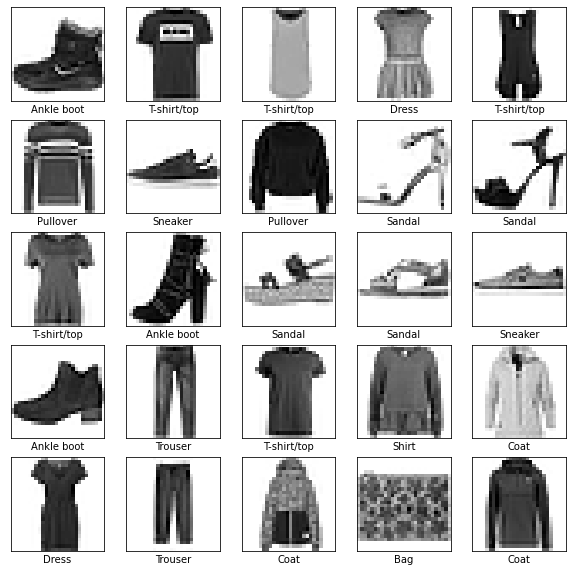

In [17]:
# Displaying for validity

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

Building the network means configuring the layers of the model and then compiling it.\

Deep learning with tensorflow is really just chaning together layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M1


2022-04-08 16:31:53.995924: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-08 16:31:53.996412: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.


### Compile the model

Here we add 3 main things.

Loss Function: he loss function , also referred to as the cost function , is the algorithm that quantifies how wrong a model is. Loss is the measure of this metric. Since loss is the model’s error, we ideally want it to be 0. Steer this function in the right direction.

Optimizer: - Optimizers is how the neural networks learn, using backpropagation to calculate the gradients. LOSS FUNCTION, SGD ARE OPTIMIZERS. (Gradient Descent)

Metrics: How accurate the model is; choose accuracy.

In [22]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = "adam",
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.
Feed the model

To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [36]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2212 - accuracy: 0.9144
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2144 - accuracy: 0.9182
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2071 - accuracy: 0.9210
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2009 - accuracy: 0.9226
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1926 - accuracy: 0.9268
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1908 - accuracy: 0.9284
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1821 - accuracy: 0.9301
Epoch 8/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1791 - accuracy: 0.9312
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1727 - accuracy: 0.9334
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - l

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [38]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4217 - accuracy: 0.8943

Test accuracy: 0.8943000435829163


In [41]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]



2022-04-08 17:13:29.262924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([0.08533681, 0.08533681, 0.08533681, 0.08533681, 0.08533681,
       0.08533681, 0.08533681, 0.08533727, 0.08533681, 0.23196827],
      dtype=float32)

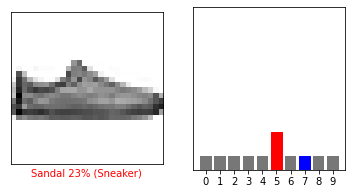

In [42]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 12 # 0th/nth image in the sequence
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

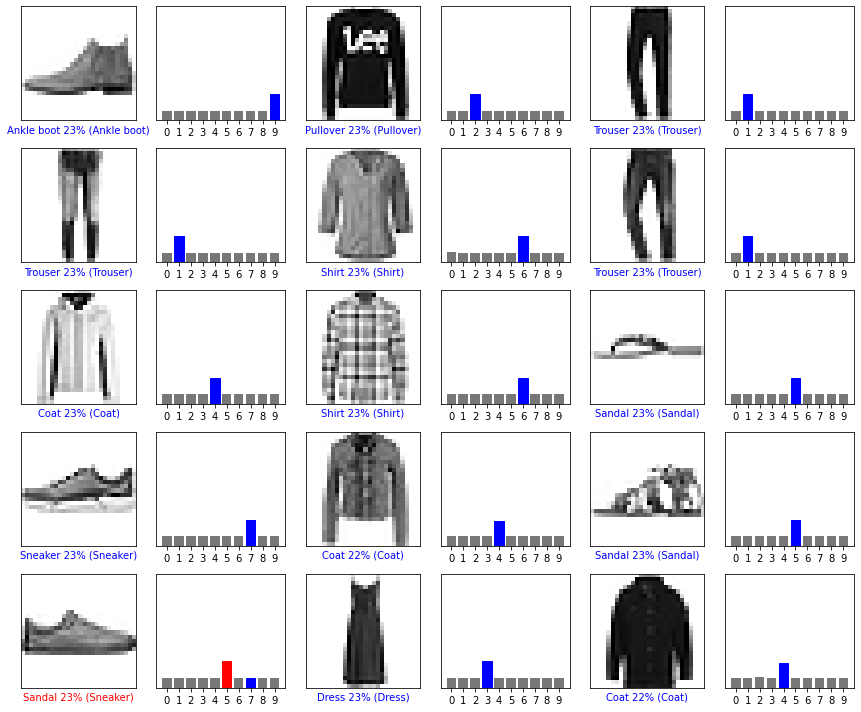

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Saving the model

In [43]:
model.save('FCNN')

INFO:tensorflow:Assets written to: FCNN/assets


2022-04-08 17:19:52.825321: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Trained Model to make a prediction about a single image

Pick a number between 1 - 10000: 4
(1, 28, 28)


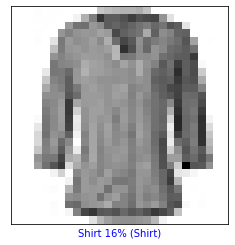

In [54]:
x = input("Pick a number between 1 - 10000: ")
x = int(x)
img = test_images[x]

img = (np.expand_dims(img,0))

print(img.shape)

# Even though we are using a single image we still need to input an array into tf.keras models

predictions_single = probability_model.predict(img)

plot_image(x, predictions[x], test_labels, test_images)


